In [1]:
!pip install opencv-python

In [2]:
!pip install tensorflow

In [3]:
import cv2
import numpy as np
import requests
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys
import datetime
from tensorflow import keras
from tensorflow.keras.models import Model
import tensorflow as tf

In [4]:
#Import dataset
import pathlib
import os

data_dir = pathlib.Path('archive/chest_xray/test-equal')
print(data_dir)
print(os.path.abspath(data_dir))

archive\chest_xray\test-equal
C:\Users\Rivar\Documents\Cours\S7-BIA\Data_Camp\archive\chest_xray\test-equal


In [5]:
image_count = len(list(data_dir.glob('*/*')))
print(image_count)

468


In [6]:
batch_size = 10
img_height = 200
img_width = 200

train_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  )

val_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = val_data.class_names
print(class_names)

Found 468 files belonging to 2 classes.
Using 375 files for training.
Found 468 files belonging to 2 classes.
Using 93 files for validation.
['NORMAL', 'PNEUMONIA']


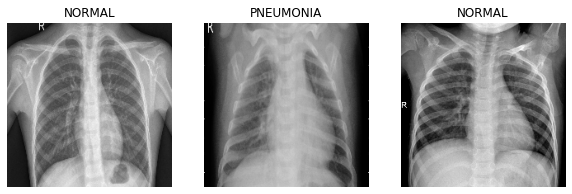

In [7]:
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(3):
    ax = plt.subplot(1, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [8]:
from tensorflow.keras import layers

num_classes = 2

model = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(128,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'],)

logdir="logs"

tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir,histogram_freq=1, write_images=logdir,
                                                   embeddings_data=train_data)

model.fit( 
    train_data,
  validation_data=val_data,
  epochs=20,
  callbacks=[tensorboard_callback]
)

Epoch 1/20


C:\Users\Rivar\anaconda3\lib\site-packages\keras\backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


38/38 [==============================] - 28s 723ms/step - loss: 0.7077 - accuracy: 0.4907 - val_loss: 0.6860 - val_accuracy: 0.5376
Epoch 2/20
38/38 [==============================] - 28s 735ms/step - loss: 0.6264 - accuracy: 0.7493 - val_loss: 0.4100 - val_accuracy: 0.8065
Epoch 3/20
38/38 [==============================] - 29s 751ms/step - loss: 0.3515 - accuracy: 0.8613 - val_loss: 0.5227 - val_accuracy: 0.7957
Epoch 4/20
38/38 [==============================] - 29s 750ms/step - loss: 0.3258 - accuracy: 0.8827 - val_loss: 0.3060 - val_accuracy: 0.8387
Epoch 5/20
38/38 [==============================] - 30s 777ms/step - loss: 0.2597 - accuracy: 0.8933 - val_loss: 0.2107 - val_accuracy: 0.8925
Epoch 6/20
38/38 [==============================] - 32s 845ms/step - loss: 0.2521 - accuracy: 0.8880 - val_loss: 0.2962 - val_accuracy: 0.8602
Epoch 7/20
38/38 [==============================] - 31s 814ms/step - loss: 0.2607 - accuracy: 0.9040 - val_loss: 0.1867 - val_accuracy: 0.9032
Epoch 8/20

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 200, 200, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 197, 197, 128)     6272      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 98, 98, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 95, 95, 64)        131136    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 47, 47, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 44, 44, 32)        3

In [10]:
urlnomal = r"C:\Users\Rivar\Documents\Cours\S7-BIA\Data_Camp\archive\chest_xray\train\NORMAL\NORMAL-74708-0001.jpeg"
urlmalade = r"C:\Users\Rivar\Documents\Cours\S7-BIA\Data_Camp\archive\chest_xray\train\PNEUMONIA\BACTERIA-92115-0002.jpeg"

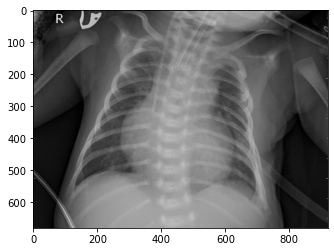

1/1 [==============================] - 0s 30ms/step
[[0.00241208 0.9975879 ]]
1/1 [==============================] - 0s 34ms/step
1
He is sick


In [11]:
image_to_predict = cv2.imread(urlmalade) 
plt.imshow(cv2.cvtColor(image_to_predict, cv2.COLOR_BGR2RGB))
plt.show()
img_to_predict = np.expand_dims(cv2.resize(image_to_predict,(200,200)), axis=0) 
res = model.predict(img_to_predict)
print(model.predict(img_to_predict))
predict_x=model.predict(img_to_predict)
classes_x=np.argmax(predict_x,axis=1)
print(classes_x[0])
if classes_x[0] == 0:
    print("This is normal")
elif classes_x[0] == 1 :
    print("He is sick")

In [12]:
model.save_weights('./checkpoints/my_checkpoint')

In [17]:
model2 = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(128,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model2.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'],)


AttributeError: module 'tensorflow' has no attribute 'Make_model'

In [18]:
model2.load_weights('./checkpoints/my_checkpoint')

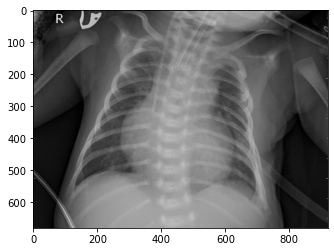

1/1 [==============================] - 0s 30ms/step
[[0.00241208 0.9975879 ]]
1/1 [==============================] - 0s 31ms/step
1
He is sick


In [23]:
image_to_predict = cv2.imread(urlmalade) 
plt.imshow(cv2.cvtColor(image_to_predict, cv2.COLOR_BGR2RGB))
plt.show()
img_to_predict = np.expand_dims(cv2.resize(image_to_predict,(200,200)), axis=0) 
res = model2.predict(img_to_predict)
print(model2.predict(img_to_predict))
predict_x=model2.predict(img_to_predict)
classes_x=np.argmax(predict_x,axis=1)
print(classes_x[0])
if classes_x[0] == 0:
    print("This is normal")
elif classes_x[0] == 1 :
    print("He is sick")